# 特征脸

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import fetch_lfw_people

In [8]:
faces = fetch_lfw_people()

In [9]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [10]:
faces.data.shape

(13233, 2914)

In [11]:
faces.images.shape

(13233, 62, 47)

In [12]:
random_indexs = np.random.permutation(len(faces.data))
X = faces.data[random_indexs]

In [18]:
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

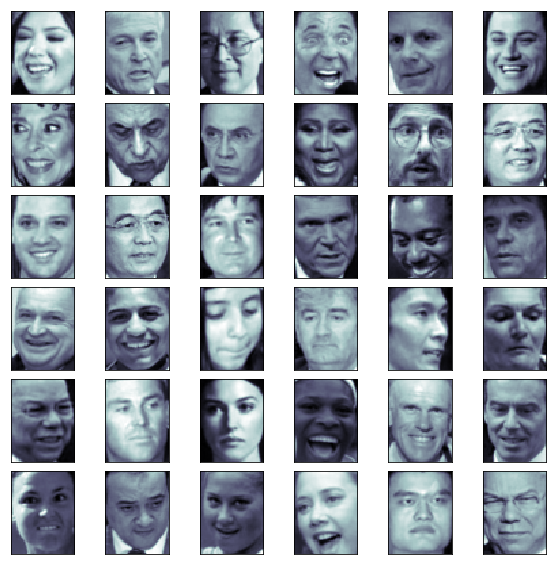

In [19]:
def plot_faces(faces):
        fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
        for i, ax in enumerate(axes.flat):
            ax.imshow(faces[i].reshape(62, 47), cmap='bone')
        plt.show()
    
plot_faces(example_faces)

In [20]:
faces.target[:10]

array([5360, 3434, 3807,   26, 3957,  439, 2683, 3734, 5465, 3445],
      dtype=int64)

In [24]:
faces.target_names[faces.target[random_indexs][:36]]

array(['Michelle Branch', 'Ronald Brower', 'Charles Kartman', 'Tom Jones',
       'Gary Condit', 'Jimmy Kimmel', 'Rita Moreno', 'Mahmoud Abbas',
       'Henrique Meirelles', 'Aretha Franklin', 'Steven Feldman',
       'Hu Jintao', 'Tony Stewart', 'Hu Jintao', 'Gore Verbinski',
       'Tom Daschle', 'Tiger Woods', 'Vojislav Kostunica',
       'Herbert Haupt', 'Abner Martinez', 'Florencia Kirchner',
       'Radovan Karadzic', 'Atsushi Sato', 'Sue Wicks', 'Colin Powell',
       'Shane Warne', 'Monica Bellucci', 'Serena Williams',
       'Peter Hillary', 'Tony Blair', 'Lindsay Davenport',
       'Nasser al-Kidwa', 'Anna Kournikova', 'Mary Landrieu', 'Yao Ming',
       'Colin Powell'], dtype='<U35')

## 特征脸

In [26]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 37.5 s


In [28]:
pca.components_.shape

(2914, 2914)

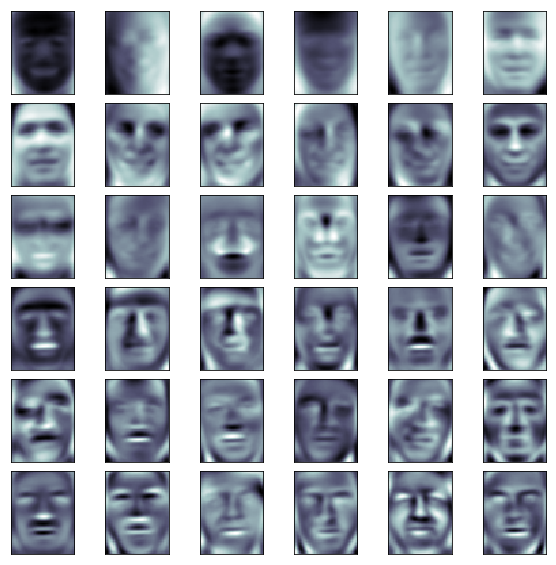

In [31]:
plot_faces(pca.components_[:36])

## 选取脸多的人

In [33]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [35]:
faces2.data.shape

(1348, 2914)

In [36]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [38]:
len(faces2.target_names) #只有8个人的脸了

8